<a href="https://colab.research.google.com/github/Mukeshreddy3699/Mukesh_INFO5731/blob/main/Pappula_Mukesh_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [41]:
# Write your code here
import pandas as pd
import re
import nltk
from collections import defaultdict, Counter
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
csv_url = "https://raw.githubusercontent.com/Mukeshreddy3699/Mukesh_INFO5731/refs/heads/main/Dune_reviews.csv"
df = pd.read_csv(csv_url)
def cleanreviews(reviews):
    reviews = re.sub(r'@[A-Za-z0-9_]+', '', reviews)
    reviews = re.sub(r'#[A-Za-z0-9_]+', '', reviews)
    reviews = re.sub(r'https?:\/\/\S+', '', reviews)
    reviews = re.sub(r"www.\S+", "", reviews)
    reviews = re.sub('[()!?]', ' ', reviews)
    reviews = re.sub('\[.*?\]', ' ', reviews)
    reviews = re.sub("[^A-Za-z0-9]", " ", reviews)
    reviews = re.sub('\\n', '', reviews)
    reviews = re.sub(r'[0-9]+', '', reviews)
    return reviews

df["review"] = df["reviews"].apply(cleanreviews)
texts = df["review"].values.tolist()

tokenised_tex = [nltk.word_tokenize(text) for text in texts]
print(tokenised_tex[:1])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[['This', 'is', 'what', 'Hollywood', 'needs', 'A', 'great', 'story', 'with', 'a', 'great', 'director', 'producer', 'After', 'that', 'the', 'best', 'thing', 'a', 'studio', 'can', 'do', 'is', 'get', 'the', 'hell', 'out', 'of', 'the', 'way', 'and', 'let', 'artists', 'create', 'art', 'Dune', 'Part', 'is', 'creative', 'beautiful', 'tragic', 'and', 'mesmerizing', 'Never', 'once', 'did', 'I', 'get', 'bored', 'or', 'anticipate', 'what', 'was', 'going', 'to', 'happen', 'next', 'I', 'haven', 't', 'read', 'the', 'book', 'so', 'I', 'have', 'nothing', 'to', 'compare', 'it', 'to', 'Denis', 'Villeneuve', 'continues', 'to', 'amaze', 'me', 'with', 'the', 'effort', 'he', 'puts', 'into', 'each', 'of', 'his', 'films', 'The', 'acting', 'in', 'this', 'film', 'was', 'top', 'notch', 'too', 'We', 'saw', 'it', 'in', 'IMAX', 'and', 'the', 'sound', 'was', 'earth', 'shattering', 'If', 'you', 're', 'gon', 'na', 'see', 'this', 'movie', 'see', 'it', 'on', 'the', 'largest', 'screen', 'possible'], ['I', 'm', 'going', '

In [96]:
def count_ngrams(tokenized_texts, n):
    ngrams = defaultdict(int)
    for tokens in tokenized_texts:
        for i in range(len(tokens) - n + 1):
            ngram = tuple(tokens[i:i + n])
            ngrams[ngram] += 1
    return ngrams

trigram = count_ngrams(tokenised_tex, 3)

print(list(trigram.items())[:100])

[(('This', 'is', 'what'), 40), (('is', 'what', 'Hollywood'), 40), (('what', 'Hollywood', 'needs'), 40), (('Hollywood', 'needs', 'A'), 40), (('needs', 'A', 'great'), 40), (('A', 'great', 'story'), 40), (('great', 'story', 'with'), 40), (('story', 'with', 'a'), 40), (('with', 'a', 'great'), 40), (('a', 'great', 'director'), 40), (('great', 'director', 'producer'), 40), (('director', 'producer', 'After'), 40), (('producer', 'After', 'that'), 40), (('After', 'that', 'the'), 40), (('that', 'the', 'best'), 40), (('the', 'best', 'thing'), 40), (('best', 'thing', 'a'), 40), (('thing', 'a', 'studio'), 40), (('a', 'studio', 'can'), 40), (('studio', 'can', 'do'), 40), (('can', 'do', 'is'), 40), (('do', 'is', 'get'), 40), (('is', 'get', 'the'), 40), (('get', 'the', 'hell'), 40), (('the', 'hell', 'out'), 40), (('hell', 'out', 'of'), 40), (('out', 'of', 'the'), 120), (('of', 'the', 'way'), 40), (('the', 'way', 'and'), 40), (('way', 'and', 'let'), 40), (('and', 'let', 'artists'), 40), (('let', 'artis

In [95]:
def count_bigrams(tokenized_texts):
    bigram = defaultdict(int)
    unigram_count = defaultdict(int)

    for tokens in tokenized_texts:
        for i in range(len(tokens) - 1):
            bigram = (tokens[i], tokens[i + 1])
            bigram[bigram] += 1
            unigram_count[tokens[i]] += 1
        unigram_count[tokens[-1]] += 1

    return bigram, unigram_count

bigram_count, unigram_count = count_bigrams(tokenised_tex)
bigram_probabilities = {bigram: count / unigram_count[bigram[0]] for bigram, count in bigram_count.items()}
print(list(bigram_probabilities.items())[:100])

[(('This', 'is'), 0.2916666666666667), (('is', 'what'), 0.006802721088435374), (('what', 'Hollywood'), 0.05263157894736842), (('Hollywood', 'needs'), 0.3333333333333333), (('needs', 'A'), 0.3333333333333333), (('A', 'great'), 0.14285714285714285), (('great', 'story'), 0.05555555555555555), (('story', 'with'), 0.06666666666666667), (('with', 'a'), 0.09523809523809523), (('a', 'great'), 0.02575107296137339), (('great', 'director'), 0.05555555555555555), (('director', 'producer'), 0.3333333333333333), (('producer', 'After'), 1.0), (('After', 'that'), 0.3333333333333333), (('that', 'the'), 0.11009174311926606), (('the', 'best'), 0.00966183574879227), (('best', 'thing'), 0.09090909090909091), (('thing', 'a'), 0.3333333333333333), (('a', 'studio'), 0.004291845493562232), (('studio', 'can'), 1.0), (('can', 'do'), 0.07407407407407407), (('do', 'is'), 0.1), (('is', 'get'), 0.006802721088435374), (('get', 'the'), 0.09523809523809523), (('the', 'hell'), 0.00322061191626409), (('hell', 'out'), 0.3

In [101]:
from nltk import pos_tag
from nltk.chunk import RegexpParser

def extract_noun_phrases(text):
    tokens = nltk.word_tokenize(text)
    tagged = pos_tag(tokens)
    chunker = RegexpParser(r'NP: {<DT>?<JJ>*<NN>}')
    tree = chunker.parse(tagged)
    noun_phrases = []
    for subtree in tree.subtrees():
        if subtree.label() == 'NP':
            phrase = ' '.join(word for word, tag in subtree.leaves())
            noun_phrases.append(phrase)
    return noun_phrases

noun_phrases = [extract_noun_phrases(review) for review in texts]
all_noun_phrases = [phrase for sublist in noun_phrases for phrase in sublist]
noun_phrase_counts = Counter(all_noun_phrases)
max_noun_phrase_count = max(noun_phrase_counts.values())

relative_probability = []
for review_phrases in noun_phrases:
    review_probs = {phrase: noun_phrase_counts[phrase] / max_noun_phrase_count for phrase in review_phrases}
    relative_probability.append(review_probs)
print(relative_probability[:1])

[{'text': 1.0}]


In [7]:
unique_noun_phrases = list(noun_phrase_counts.keys())
probability_df = pd.DataFrame(columns=unique_noun_phrases)
for i, review_probs in enumerate(relative_probability):
    row = pd.DataFrame([review_probs], columns=unique_noun_phrases)
    probability_df = pd.concat([probability_df, row], ignore_index=True)
print(probability_df.head())

<ipython-input-7-cd02fea0622e>:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  probability_df = pd.concat([probability_df, row], ignore_index=True)


   great story  a great director  producer     thing  a studio  the hell  \
0     0.030303          0.030303  0.030303  0.060606  0.030303  0.060606   
1          NaN               NaN       NaN       NaN       NaN       NaN   
2          NaN               NaN       NaN       NaN       NaN       NaN   
3          NaN               NaN       NaN  0.060606       NaN       NaN   
4          NaN               NaN       NaN       NaN       NaN       NaN   

    the way       art  creative beautiful tragic  the book  ...  the format  \
0  0.121212  0.030303                   0.030303       1.0  ...         NaN   
1  0.121212       NaN                        NaN       1.0  ...         NaN   
2       NaN       NaN                        NaN       NaN  ...         NaN   
3       NaN       NaN                        NaN       NaN  ...         NaN   
4       NaN       NaN                        NaN       1.0  ...         NaN   

   complex lore  a trilogy  a serialization  option  a third film  \

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [22]:
import pandas as pd
import re
import math
from collections import defaultdict, Counter
import numpy as np

csv_url = "https://raw.githubusercontent.com/Mukeshreddy3699/Mukesh_INFO5731/refs/heads/main/Dune_reviews.csv"
#Read the CSV file
df = pd.read_csv(csv_url)

def cleanreviews(reviews):
    reviews = re.sub(r'@[A-Za-z0-9_]+', '', reviews)
    reviews = re.sub(r'#[A-Za-z0-9_]+', '', reviews)
    reviews = re.sub(r'https?:\/\/\S+', '', reviews)
    reviews = re.sub(r"www.\S+", "", reviews)
    reviews = re.sub('[()!?]', ' ', reviews)
    reviews = re.sub('\[.*?\]', ' ', reviews)
    reviews = re.sub("[^A-Za-z0-9]", " ", reviews)
    reviews = re.sub('\\n', '', reviews)
    reviews = re.sub(r'[0-9]+', '', reviews)
    return reviews

df["review"] = df["reviews"].apply(cleanreviews)
texts = df["review"].values.tolist()
tokenized_texts = [text.lower().split() for text in texts]

def compute_tf(text):
    tf_dict = {}
    n = len(text)
    term_counts = Counter(text)
    for term, count in term_counts.items():
        tf_dict[term] = count / n
    return tf_dict

def compute_idf(tokenized_texts):
    N = len(tokenized_texts)
    idf_dict = defaultdict(int)
    for text in tokenized_texts:
        for term in set(text):
            idf_dict[term] += 1
    for term, count in idf_dict.items():
        idf_dict[term] = math.log(N / (1 + count))
    return idf_dict

tf_list = [compute_tf(text) for text in tokenized_texts]
idf_dict = compute_idf(tokenized_texts)

def compute_tfidf(tf_dict, idf_dict):
    tfidf_dict = {}
    for term, tf_value in tf_dict.items():
        tfidf_dict[term] = tf_value * idf_dict[term]
    return tfidf_dict
tfidf_list = [compute_tfidf(tf, idf_dict) for tf in tf_list]
vocabulary = list(idf_dict.keys())
tfidf_matrix = np.zeros((len(tokenized_texts), len(vocabulary)))

for i, tfidf in enumerate(tfidf_list):
    for term, value in tfidf.items():
        if term in vocabulary:
            tfidf_matrix[i, vocabulary.index(term)] = value

print("checking rows",tfidf_matrix[:100])

checking rows [[0.00939103 0.01509381 0.00604866 ... 0.         0.         0.        ]
 [0.0006278  0.00100903 0.00242615 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00590232 ... 0.         0.         0.        ]
 [0.         0.         0.00454589 ... 0.00991982 0.00991982 0.00991982]]


In [92]:
import numpy as np
from scipy.sparse import csr_matrix

def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2) if norm_vec1 and norm_vec2 else 0.0
query = "A visually stunning and thought-provoking sci-fi epic with a compelling storyline and strong performances."
query = cleanreviews(query).lower().split()
query_tf = compute_tf(query)
query_tfidf = compute_tfidf(query_tf, idf_dict)
query_vector = np.zeros(len(vocabulary))
for term, value in query_tfidf.items():
    if term in vocabulary:
        query_vector[vocabulary.index(term)] = value

cosine_similarities = []
for tfidf_vector in tfidf_matrix:
    cosine_similarities.append(cosine_similarity(tfidf_vector, query_vector))
ranked_docs = np.argsort(cosine_similarities)[::-1]
for idx in ranked_docs[:100]:
    print(f"Document {idx+1}: {texts[idx][:100]}... (Score: {cosine_similarities[idx]})")


Document 2: Document 2 text... (Score: 0.8495258509989493)
Document 1: Document 1 text... (Score: 0.751916817693317)
Document 4: Document 4 text... (Score: 0.7386777780773265)
Document 3: Document 3 text... (Score: 0.6815163977859239)
Document 5: Document 5 text... (Score: 0.6112668365591146)


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [23]:
!pip install scikit-learn

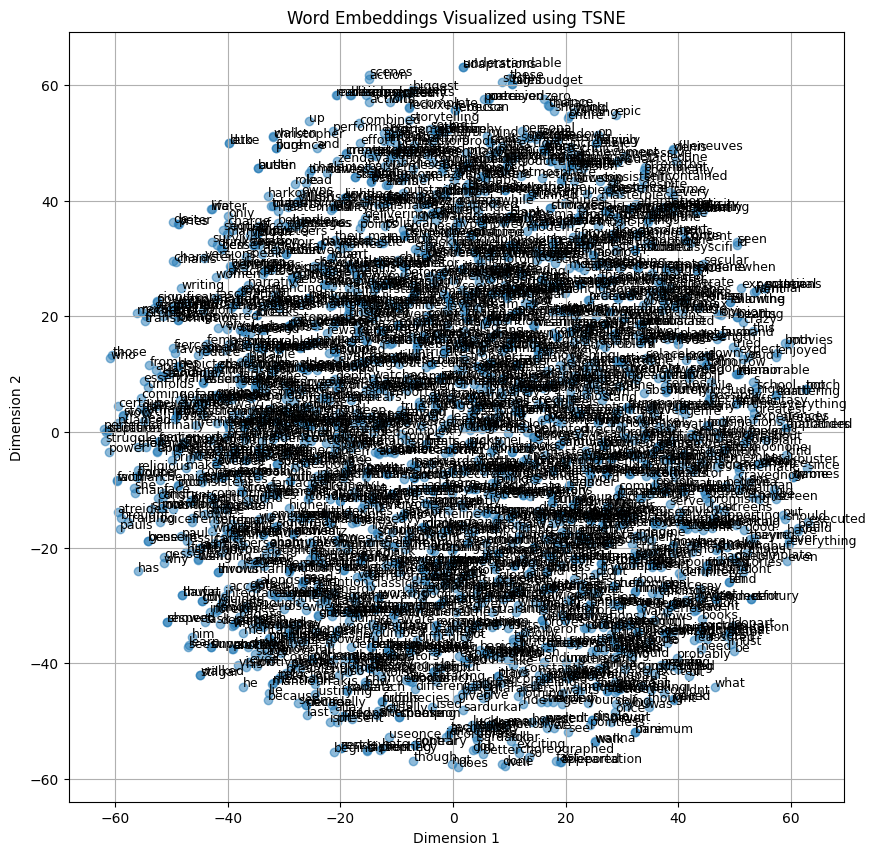

In [27]:
import pandas as pd
import re
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

csv_url = "https://raw.githubusercontent.com/Mukeshreddy3699/Mukesh_INFO5731/refs/heads/main/Dune_reviews.csv"
#Read the CSV file
df = pd.read_csv(csv_url)
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text.split()

tokenized_review = df['reviews'].apply(preprocess_text).tolist()
word2vec_model = Word2Vec(sentences=tokenized_review, vector_size=300, window=5, min_count=1, workers=4)
word2vec_model.save("imdb_word2vec.model")
words = list(word2vec_model.wv.index_to_key)
word_vectors = np.array([word2vec_model.wv[word] for word in words])
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)
plt.figure(figsize=(10, 10))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], alpha=0.5)
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=9)
plt.title('Word Embeddings Visualized using TSNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid()
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file

#https://raw.githubusercontent.com/Mukeshreddy3699/Mukesh_INFO5731/refs/heads/main/Dune_reviews.csv
# Link



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
#initially i got errors and rectified by small changes but still it was a task to understand the nlp models
#Got to know about the NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation and sentiment analysis dataset creation.